## Common Functions in the Python Imaging Library
Lets take a look at some of the common tasks we can do in python using the pillow library.

In [1]:
# First, lets import the PIL library and the Image object
import PIL
from PIL import Image
# And lets import the display functionality
from IPython.display import display
# And finally, lets load the image we were working with last time
file="readonly/msi_recruitment.gif"
image=Image.open(file)

In [2]:
# Great, now lets check out a few more methods of the image library. First, we'll look at copy
# And if you remember, we can do this using the built in python help() function
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.GifImagePlugin.GifImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [3]:
# We can see that copy takes no arguments, and that the return object is an Image object itself. Now lets
# look at save
help(image.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.GifImagePlugin.GifImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename ext

In [8]:
# The save method has a couple of parameters which are interesting. The first, called fp, is the filename
# we want to save the object too. The second, format, is interesting, it allows us to change the type of
# the image, but the docs tell us that this should be done automatically by looking at the file extension
# as well. Lets give it a try -- this file was originally a GifImageFile, but I bet if we save it with a
# .png format and read it in again we'll get a different kind of file
image.save("msi_recruitment.png")
image=Image.open("msi_recruitment.png")
import inspect
inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [5]:
# Indeed, this created a new file, which we could view by going to the Jupyter notebook file list by clicking
# on the logo at the top of the browser, and we can see this new object is actually a PngImageFile object
# For the purposes of this class the difference in image formats isn't so important, but it's nice that you can
# explore how a library works using the functions of help(), dir() and getmro().
#
# The PILLOW library also has some nice image filters to add some effects. It does this through the filter()
# function. The filter() function takes a Filter object, and those are all stored in the ImageFilter object.
# Lets take a look.
from PIL import ImageFilter
help(ImageFilter)

Help on module PIL.ImageFilter in PIL:

NAME
    PIL.ImageFilter

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # standard filters
    #
    # History:
    # 1995-11-27 fl   Created
    # 2002-06-08 fl   Added rank and mode filters
    # 2003-09-15 fl   Fixed rank calculation in rank filter; added expand call
    #
    # Copyright (c) 1997-2003 by Secret Labs AB.
    # Copyright (c) 1995-2002 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Filter
            ModeFilter
            MultibandFilter
                BoxBlur
                BuiltinFilter
                    BLUR
                    CONTOUR
                    DETAIL
                    EDGE_ENHANCE
                    EDGE_ENHANCE_MORE
                    EMBOSS
                    FIND_EDGES
                    Kernel
                    SHARPEN
                    SMOOTH
                    SMOOTH_MORE
          

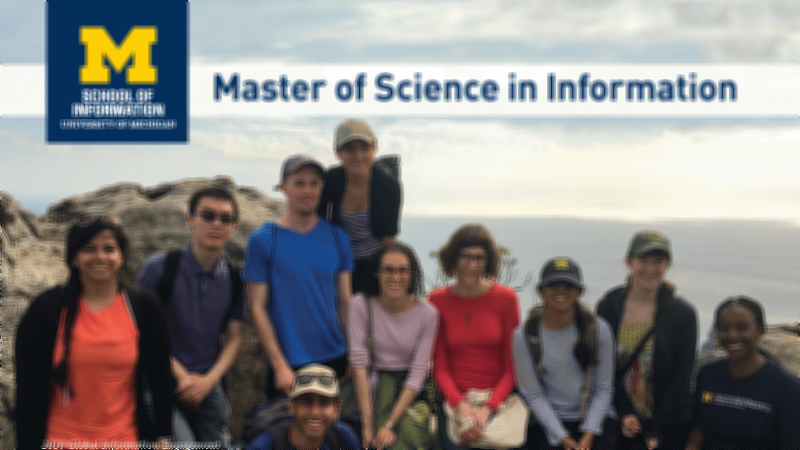

In [7]:
# There are a bunch of different filters here, but lets just try and apply the BLUR filter. Before we do this
# we have to convert the image to RGB mode. This is a bit magical -- images like gifs are limited in how many
# colors can be displayed at once based on the size of the pallet. This is similar to a painters pallet, which
# only has so much room. This is actually a very old image file format. If we convert the image into something
# more sophisticated we can apply these interesting image transforms. Sometimes learning a new library means
# digging a bit deeper into the domain the library is about. We can convert the image using the convert()
# function.
image=image.convert('RGB') # this stands for red, green blue mode
blurred_image=image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

I encourage you to pause the video here, jump into the notebooks, and start experimenting with some of the other filters. The EMBOSS and SHARPEN filters, for instance, are interesting. Or for a challenge, check out the BoxBlur or MedianFilter functions and look at their parameters to get an idea of how they are used.

In [7]:
# Ok, let me show you one more function in the lecture, which is crop(). This removes portions of the image
# except for the bounding box you describe. When you think of images, think of individual dots or pixels
# which make up that image being lined up in a grid. You can actually see the number of pixels high the image
# is and the width of the image 
print("{}x{}".format(image.width, image.height))

800x450


In [8]:
# This means that the image is 800 pixels wide (the X axis), and 450 pixels high (the Y axis). If we take a 
# look at the crop documentation we see that the first parameter to the function is a tuple which is the 
# left, upper, right, and lower values of the X/Y coordinates
help(image.crop)

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



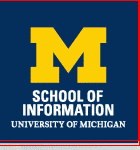

In [12]:
# With PIL images, we define the bounding box using the upper left corner and the lower right corner. And
# we count the number of pixels out from the upper left corner, which is 0,0. This might seem odd if you're
# used to coordinate systems where you start in the lower left -- just remember that we define our box in the
# same way we count out positions in the image.
#
# So, if we wanted to get the Michigan logo out of this image, we might start with the left at, say 50 pixels,
# and the top at 0 pixels, then we might walk to the right another 190 pixels, and set the lower bound to say
# 150 pixels
display(image.crop((50,0,190,150)))

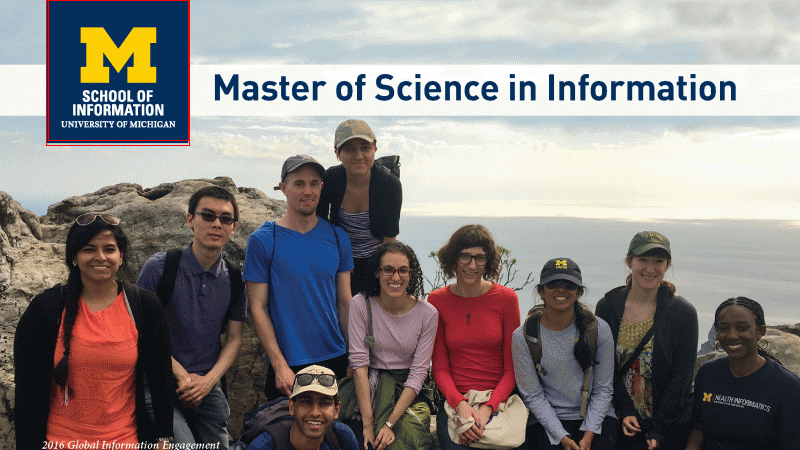

In [11]:
# Of course crop(), like other functions, only returns a copy of the image, and doesn't change the image itself.
# A strategy I like to do is try and draw the bounding box directly on the image, when I'm trying to line things
# up. We can draw on images using the ImageDraw object. I'm not going to go into this in detail, but here's a 
# quick example of how. I might draw the bounding box in this case.
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((46,0,189,145), fill = None, outline ='red')
display(image)

Ok, that's been asn overview of how to use PIL for single images. But, a lot of work might involve multiple images, and putting images together. In the next lecture we'll tackle that, and set you up for the assignment.